In [1]:
!pip install kaggle

In [2]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

## DATASET

In [3]:
!kaggle competitions download -c dogs-vs-cats

 99% 800M/812M [00:06<00:00, 144MB/s]
100% 812M/812M [00:06<00:00, 137MB/s]


In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
#unzipping the files
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile('dogs-vs-cats.zip', 'r') as zip:
    zip.extractall()
    print('dataset is extracted')

dataset is extracted


In [6]:
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile('train.zip', 'r') as zip:
    zip.extractall()
    print('dataset train is extracted')

dataset train is extracted


In [7]:
#counting the no of files in train folder
import os
path,dirs,files = next(os.walk('/content/train'))
file_count = len(files)
print('number of images ' , file_count)


number of images  25000


# PRINTING NAME OF IMAGES

In [8]:
file_name = os.listdir('/content/train')
print(file_name)

['dog.11840.jpg', 'dog.5331.jpg', 'cat.7626.jpg', 'dog.11594.jpg', 'cat.4145.jpg', 'dog.11611.jpg', 'cat.7531.jpg', 'cat.3806.jpg', 'dog.4724.jpg', 'dog.5656.jpg', 'dog.10621.jpg', 'dog.10158.jpg', 'cat.11005.jpg', 'dog.11155.jpg', 'dog.10890.jpg', 'cat.11418.jpg', 'dog.447.jpg', 'cat.7475.jpg', 'cat.11341.jpg', 'dog.4734.jpg', 'cat.9083.jpg', 'cat.4888.jpg', 'cat.8532.jpg', 'dog.1184.jpg', 'dog.11481.jpg', 'dog.9983.jpg', 'dog.6002.jpg', 'dog.8571.jpg', 'cat.6434.jpg', 'dog.4904.jpg', 'dog.4406.jpg', 'cat.7269.jpg', 'cat.4933.jpg', 'cat.10275.jpg', 'dog.7224.jpg', 'dog.9831.jpg', 'dog.3383.jpg', 'cat.10817.jpg', 'cat.2735.jpg', 'dog.10849.jpg', 'dog.863.jpg', 'dog.9786.jpg', 'dog.8789.jpg', 'dog.11334.jpg', 'cat.4546.jpg', 'dog.3601.jpg', 'dog.7050.jpg', 'cat.9127.jpg', 'cat.11139.jpg', 'cat.409.jpg', 'dog.7496.jpg', 'dog.5272.jpg', 'dog.5443.jpg', 'dog.11270.jpg', 'dog.3119.jpg', 'dog.2981.jpg', 'cat.150.jpg', 'cat.10431.jpg', 'dog.8844.jpg', 'cat.9612.jpg', 'cat.10446.jpg', 'cat.590

# IMPORTING LIBRARIES

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
#display images
from google.colab.patches import cv2_imshow

# DISPLAYING IMAGES

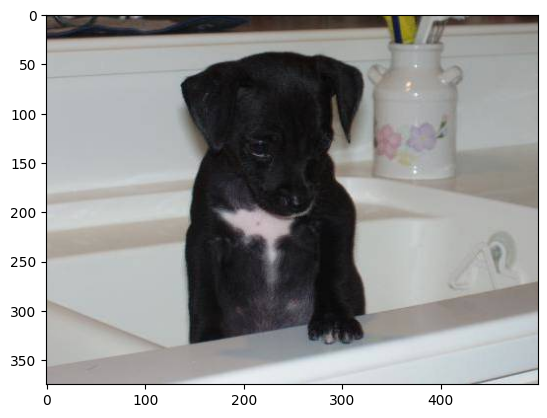

In [10]:
#dog images
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)

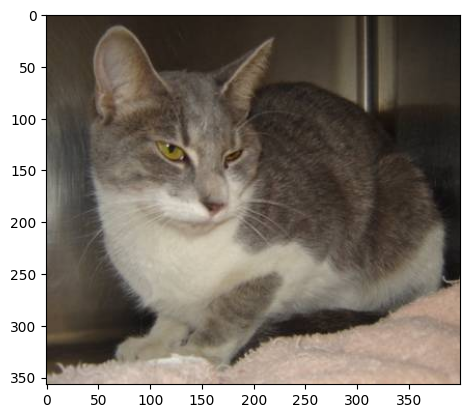

In [11]:
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)

In [12]:
#finding total dog and cat images
file_name = os.listdir('/content/train')
dog_count = 0
cat_count = 0
# for i in range(len(file_name)):
#     if file_name[i].startswith('dog'):
#         dog_count = dog_count + 1
#     elif file_name[i].startswith('cat'):
#         cat_count = cat_count + 1
for img_file in file_name:
     name = img_file[0:3]
     if name == 'dog':
       dog_count += 1
     else:
       cat_count += 1

print('number of dog images ' , dog_count)
print('number of cat images ' , cat_count)

number of dog images  12500
number of cat images  12500


# RESIZING ALL IMAGES

In [13]:
#creating a copy of all resized images and reducing no. of images
os.mkdir(path = '/content/image resized')

In [14]:
orginal_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):
  #copy original path to filename
  file_name = os.listdir(orginal_folder)[i]
  img_path = orginal_folder  + file_name
  #resizing
  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder + file_name
  img.save(newImgPath)

In [15]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [16]:
file_name = os.listdir('/content/image resized')
print(file_name)

['dog.11840.jpg', 'dog.5331.jpg', 'cat.7626.jpg', 'dog.11594.jpg', 'cat.4145.jpg', 'dog.11611.jpg', 'cat.7531.jpg', 'cat.3806.jpg', 'dog.4724.jpg', 'dog.5656.jpg', 'dog.10621.jpg', 'dog.10158.jpg', 'cat.11005.jpg', 'dog.11155.jpg', 'dog.10890.jpg', 'cat.11418.jpg', 'dog.447.jpg', 'cat.7475.jpg', 'cat.11341.jpg', 'dog.4734.jpg', 'cat.9083.jpg', 'cat.4888.jpg', 'cat.8532.jpg', 'dog.1184.jpg', 'dog.11481.jpg', 'dog.9983.jpg', 'dog.6002.jpg', 'dog.8571.jpg', 'cat.6434.jpg', 'dog.4904.jpg', 'dog.4406.jpg', 'cat.7269.jpg', 'cat.4933.jpg', 'cat.10275.jpg', 'dog.7224.jpg', 'dog.9831.jpg', 'dog.3383.jpg', 'cat.10817.jpg', 'cat.2735.jpg', 'dog.10849.jpg', 'dog.863.jpg', 'dog.9786.jpg', 'dog.8789.jpg', 'dog.11334.jpg', 'cat.4546.jpg', 'dog.3601.jpg', 'dog.7050.jpg', 'cat.9127.jpg', 'cat.11139.jpg', 'cat.409.jpg', 'dog.7496.jpg', 'dog.5272.jpg', 'dog.5443.jpg', 'dog.11270.jpg', 'dog.3119.jpg', 'dog.2981.jpg', 'cat.150.jpg', 'cat.10431.jpg', 'dog.8844.jpg', 'cat.9612.jpg', 'cat.10446.jpg', 'cat.590

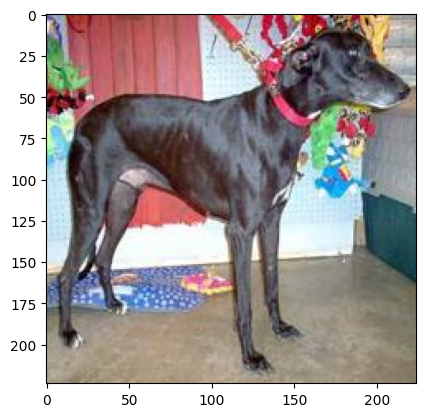

In [18]:
#dog image resized
img = mpimg.imread('/content/image resized/dog.11840.jpg')
imgplt = plt.imshow(img)
plt.show()

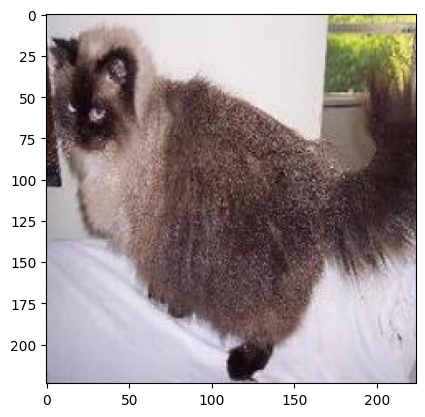

In [19]:
# resized cat image
img = mpimg.imread('/content/image resized/cat.7626.jpg')
imgplt = plt.imshow(img)
plt.show()

In [20]:
# label cats as 0 and dogs as 1
#creating a for loop for assigning labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [21]:
print(file_name[0:5])
print(len(file_name))


cat.4
12


In [22]:
print(labels[0:5])
print(len(labels))

[1, 1, 0, 1, 0]
2000


In [23]:
# images of cats and dogs
values,count = np.unique(labels, return_counts=True)
print(values)
print(count)


[0 1]
[1034  966]


# CONVERTING ALL RESIZED IMAGES TO NUMPY ARRAY

In [24]:
import cv2
import glob

In [25]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

#to check extension of file
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

#read file and convert it into array
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [26]:
print(dog_cat_images)

[[[[180 128 115]
   [198 156 143]
   [199 172 162]
   ...
   [144 141 137]
   [145 143 142]
   [149 147 146]]

  [[150  93  84]
   [161 114 106]
   [167 138 131]
   ...
   [152 150 149]
   [161 159 158]
   [166 167 165]]

  [[157  92  91]
   [151  94  93]
   [135  95  96]
   ...
   [157 157 157]
   [154 154 154]
   [150 152 152]]

  ...

  [[157 176 183]
   [151 170 177]
   [144 163 170]
   ...
   [100 120 131]
   [101 121 132]
   [102 122 133]]

  [[148 167 174]
   [144 163 170]
   [137 156 163]
   ...
   [101 121 132]
   [100 120 131]
   [100 120 131]]

  [[133 152 159]
   [135 154 161]
   [136 155 162]
   ...
   [101 121 132]
   [ 99 119 130]
   [ 99 119 130]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [241 252 250]
   [240 251 249]
   [241 252 250]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [238 249 247]
   [239 250 248]
   [240 251 249]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [230 240 240]
   [233 244 242]
   [236 247

In [27]:
type(dog_cat_images)

numpy.ndarray

In [28]:
print(dog_cat_images.shape) # 3 represents rgb  ,224 pixels

(2000, 224, 224, 3)


In [29]:
X = dog_cat_images
y = np.asarray(labels)

# TRAIN TEST SPLIT

In [30]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [31]:
print(X.shape , X_train.shape , X_test.shape )

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


# SCALING DATA

In [32]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [33]:
print(X_train_scaled)

[[[[0.41176471 0.68627451 0.63529412]
   [0.36862745 0.63529412 0.59215686]
   [0.38039216 0.60392157 0.59215686]
   ...
   [0.30196078 0.56470588 0.50588235]
   [0.3372549  0.60392157 0.5372549 ]
   [0.34901961 0.62352941 0.55686275]]

  [[0.43921569 0.71764706 0.65490196]
   [0.4        0.67058824 0.61960784]
   [0.39607843 0.63137255 0.60784314]
   ...
   [0.23529412 0.50980392 0.44313725]
   [0.25098039 0.52941176 0.4627451 ]
   [0.3372549  0.61568627 0.54901961]]

  [[0.34901961 0.63921569 0.56862745]
   [0.38039216 0.65098039 0.59215686]
   [0.41960784 0.65490196 0.62352941]
   ...
   [0.34509804 0.64313725 0.57254902]
   [0.40784314 0.70588235 0.63529412]
   [0.43921569 0.74901961 0.66666667]]

  ...

  [[0.10980392 0.35294118 0.25882353]
   [0.27843137 0.53333333 0.43529412]
   [0.4        0.65490196 0.56862745]
   ...
   [0.19215686 0.53333333 0.40392157]
   [0.18039216 0.52156863 0.39215686]
   [0.29411765 0.62745098 0.50196078]]

  [[0.0627451  0.29803922 0.20392157]
   [0.2

# BUILDING THE NEURAL NETWORK MODEL

In [34]:
import tensorflow as tf
import tensorflow_hub as hub

In [35]:
#downloads the model
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretarined_model = hub.KerasLayer(mobilenet_model,input_shape = (224,224,3) , trainable=False)

In [36]:
num_of_classes = 2 # types of iamges
model = tf.keras.Sequential([
        pretarined_model,
        tf.keras.layers.Dense(num_of_classes)
    ])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [38]:
model.compile(

              optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['acc']
)

In [39]:
model.fit(X_train_scaled,y_train,epochs = 5)

Epoch 1/5
50/50 [==============================] - 82s 1s/step - loss: 0.2199 - acc: 0.9050
Epoch 2/5
50/50 [==============================] - 103s 2s/step - loss: 0.0668 - acc: 0.9794
Epoch 3/5
50/50 [==============================] - 88s 2s/step - loss: 0.0498 - acc: 0.9862
Epoch 4/5
50/50 [==============================] - 87s 2s/step - loss: 0.0376 - acc: 0.9906
Epoch 5/5
50/50 [==============================] - 118s 2s/step - loss: 0.0318 - acc: 0.9931


In [40]:
score , acc = model.evaluate(X_test_scaled,y_test)
print('test loss' , score)
print('test accuracy' , acc)

13/13 [==============================] - 19s 1s/step - loss: 0.0566 - acc: 0.9850
test loss 0.05656174570322037
test accuracy 0.9850000143051147


# PREDICTIVE SYSTEM

enter image path/content/dog.jpg


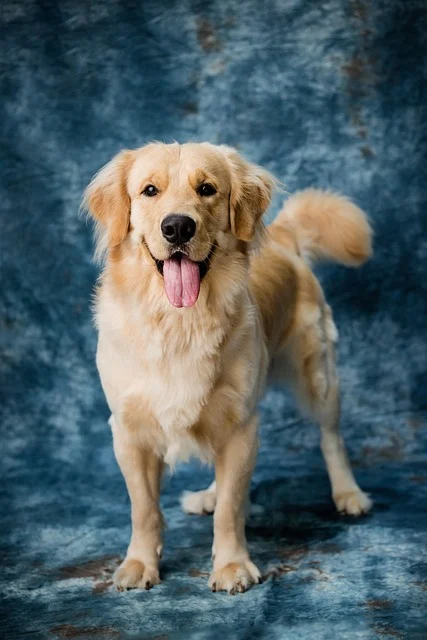

1/1 [==============================] - 0s 51ms/step
[[-3.5706565  5.564603 ]]
dog


In [45]:
input_image_path = input('enter image path')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image,(224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction =  model.predict(image_reshaped)

input_perdict_label = np.argmax(input_prediction)

prediction = model.predict(image_reshaped)

print(input_prediction)

if input_perdict_label == 0:
  print('cat')

else:
  print('dog')

Path of the image to be predicted: /content/cat.1.jpg


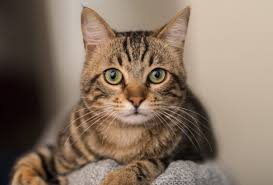

1/1 [==============================] - 0s 51ms/step
[[ 3.5909905 -3.8604565]]
0
The image represents a Cat


In [48]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')